In [21]:
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import random_split, Subset
from torch.utils.data.dataloader import DataLoader
from torchvision.utils import make_grid
import torch.nn as nn 
import torch.nn.functional as F
import torch
import matplotlib.pyplot as plt
import numpy as np


In [18]:
#train and test data directory
data_dir = "PetImages/Training"

dataset = ImageFolder(data_dir, transform = transforms.Compose([
    transforms.Resize((256,256)),
    transforms.ToTensor()
]))

#Processing code
testn = len(dataset)
testn_train = 1000
train1, test1 = random_split(dataset, [testn_train, testn-testn_train])
print(len(train1))

n = len(train1)
n_train = int(0.7 * n)
train, test = random_split(train1, [n_train, n-n_train])


batch_size = 128
#Loading training and testing set into batches
train_dl = DataLoader(train, batch_size, shuffle = True, num_workers=4, pin_memory=True)
test_dl = DataLoader(test, batch_size*2, num_workers=4, pin_memory=True)

1000


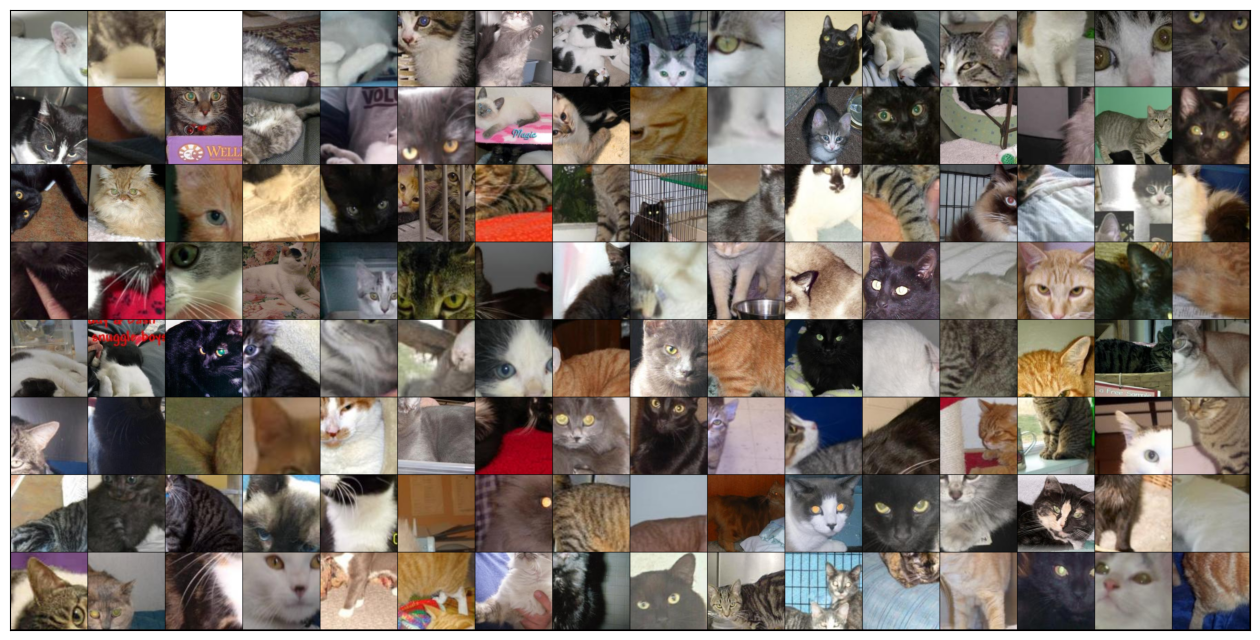

In [19]:
def show_batch(dl):
    """Plot images grid of single batch"""
    for images, labels in dl:
        fig,ax = plt.subplots(figsize = (16,12))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images,nrow=16).permute(1,2,0))
        break
        
show_batch(train_dl)

In [22]:
class CNN(nn.Module):
    #https://www.kaggle.com/code/androbomb/using-cnn-to-classify-images-w-pytorch
    def __init__(self, num_classes=3):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, stride=1, padding=1)

        self.conv2 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, stride=1, padding=1)

        self.pool = nn.MaxPool2d(kernel_size=2)

        self.drop = nn.Dropout2d(p=0.2)   

        self.fc = nn.Linear(in_features=32 * 32 * 24, out_features=num_classes)

    def forward(self, x):
        x = F.relu(self.pool(self.conv1(x)))

        x = F.relu(self.pool(self.conv2(x)))

        x = F.dropout(self.drop(x), training=self.training)

        x = x.view(-1, 32 * 32 * 24)

        x = self.fc(x)

        return torch.log_softmax(x, dim=1)

device = "cpu"
if (torch.cuda.is_available()):
    device = "cuda"

model = CNN(num_classes=2).to(device)
print(model)

def train(model, device, train_loader, optimizer, epoch):
    # Set the model to train
    model.train()
    train_loss = 0
    print("Epoch: ", epoch)

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()

        output = model(data)

        loss = loss_criteria(output, target)

        train_loss += loss.item()

        loss.backward()
        optimizer.step()

        print("\tTraining batch {} Loss: {:.6f}".format(batch_idx + 1, loss.item()))

    avg_loss = train_loss / (batch_idx+1)
    print("Training set: Average loss: {:.6f}".format(avg_loss))
    return avg_loss


CNN(
  (conv1): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop): Dropout2d(p=0.2, inplace=False)
  (fc): Linear(in_features=24576, out_features=2, bias=True)
)
